#Answering...The Riddler
http://fivethirtyeight.com/features/can-you-survive-this-deadly-board-game/

While traveling in the Kingdom of Arbitraria, you are accused of a heinous crime. 
Arbitraria decides who’s guilty or innocent not through a court system, but a board game. 
It’s played on a simple board: a track with sequential spaces numbered from 0 to 1,000. 
The zero space is marked “start,” and your token is placed on it. 
You are handed a fair six-sided die and three coins. 
You are allowed to place the coins on three different (nonzero) spaces. 
Once placed, the coins may not be moved.

After placing the three coins, you roll the die and move your token forward the appropriate number of spaces. 
If, after moving the token, it lands on a space with a coin on it, you are freed. 
If not, you roll again and continue moving forward. 
If your token passes all three coins without landing on one, you are executed. 
On which three spaces should you place the coins to maximize your chances of survival?

#Approach:
##1. Create a board
   Could be the given size (1000, or other). In order to make a difference, it should be a function of the sides of the die, otherwise the last spaces all are going to have a similarly low probability.
##2. Create a die
   Either a 6-sides die or some of the more common dice in RPG, or a single 2-sided die (aka "coin").
    Could be a fair game, could favor some side.
##3. Calculate the different probabilities of landing in each space of the board with the given die
   Start at zero. Calculate the chances of falling into any of the next spaces (limited by the number of sides of the die). Assume there are no "snakes & ladders".

In [1]:
#Definitions and imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

D:\Anaconda3\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [3]:
class Die():
    '''Creates an object with X sides. Could be used to implement "not fair" dice or other'''
    def __init__(self,integer):
        self.sides = integer
        
def init_board(size):
    '''returns an unused linear board of the specified size,
    with the probabilities of landing at the different spaces at zero'''
    board_prob = np.zeros((size,))
    #Start space : 'zero'
    board_prob[0] = 1
    return board_prob
    
def create_die(sides):
    return Die(sides)

def update_board_prob(board_prob,die):
    '''Receives a board and a die.
    Starts in zero: calculate the probabilites of landing in all the possible spaces that you can reach from zero.
    Move one square forward (the game does not seem to allow going backwards). Multiply the chances of having landed
    on the current space times the probabilitis of landing in all the possible spaces that you can reach.
    Iterate until you get to the last space'''
    
    for current_loc in range(len(board_prob)+1):
        #update probabilities:
        #sides of the die:
        for n in range(1,die.sides+1):
            if (current_loc+n) < len(board_prob):
                board_prob[current_loc+n] += (1/die.sides)*board_prob[current_loc] 
    return board_prob


def run_game(board_size, die_sides):
    
    board = init_board(board_size)
    die = create_die(die_sides)
    board = update_board_prob(board, die)
    print('Board of {} spaces. Die of {} sides. Maximum probability for one space is {}'.format(len(board), die.sides,board[1:].max()))
    return board

In [4]:
#Run it!

In [5]:
board_size = 1000
common_dice = [2,3,4,6,8,10,12,16,20]
list_df = []
for val in common_dice:
    board = run_game(board_size, val)
    temp_df = pd.DataFrame(data = board)
    temp_df['sides'] = val
    temp_df.columns = ['prob','sides']
    list_df.append(temp_df)
df = pd.concat(list_df)
df['space'] = df.index.copy()
df = df[df['space'] !=0]
    

Board of 1000 spaces. Die of 2 sides. Maximum probability for one space is 0.75
Board of 1000 spaces. Die of 3 sides. Maximum probability for one space is 0.5925925925925926
Board of 1000 spaces. Die of 4 sides. Maximum probability for one space is 0.48828125
Board of 1000 spaces. Die of 6 sides. Maximum probability for one space is 0.3602323388203017
Board of 1000 spaces. Die of 8 sides. Maximum probability for one space is 0.2850871682167053
Board of 1000 spaces. Die of 10 sides. Maximum probability for one space is 0.23579476910000013
Board of 1000 spaces. Die of 12 sides. Maximum probability for one space is 0.2010027146326676
Board of 1000 spaces. Die of 16 sides. Maximum probability for one space is 0.15517226455097644
Board of 1000 spaces. Die of 20 sides. Maximum probability for one space is 0.1263475097687819


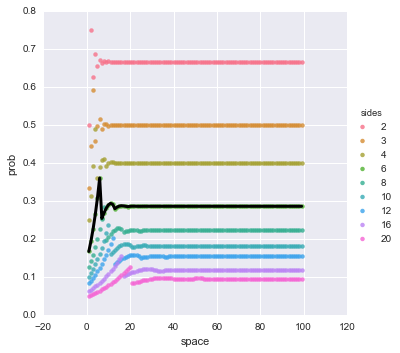

In [6]:
#plot the different dice results
g = sns.lmplot('space','prob', data = df[df['space'] < 100], hue='sides', fit_reg=False)
six_sides = df[df['sides'] == 6]
six_sides = six_sides[six_sides['space']<100]

#highlight the question (die = 6 sides)
g.ax.plot(six_sides['space'], six_sides['prob'], color='black',linewidth = 3)

plt.show()

## The best three positions are:

In [7]:
six_sides.sort_values(by='prob', ascending=False, inplace=True)
six_sides.head(3)

,prob,sides,space
6,0.360232,6,6
5,0.308771,6,5
11,0.293393,6,11


In [8]:
six_sides.head(10)

,prob,sides,space
6,0.360232,6,6
5,0.308771,6,5
11,0.293393,6,11
12,0.290830,6,12
10,0.289288,6,10
16,0.287071,6,16
17,0.286702,6,17
15,0.286114,6,15
21,0.285968,6,21
22,0.285944,6,22


In [10]:
six_sides.tail(10)

,prob,sides,space
19,0.284713,6,19
14,0.283540,6,14
9,0.280369,6,9
13,0.279263,6,13
8,0.268094,6,8
4,0.264660,6,4
7,0.253604,6,7
3,0.226852,6,3
2,0.194444,6,2
1,0.166667,6,1
